In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
L2READTR = 'l2_read_transactions'
L2WRITETR = 'l2_write_transactions'
DRAMREADB = 'dram_read_bytes'
DRAMWRITEB = 'dram_write_bytes'

cacheline = 64

In [3]:
l2rt = pd.read_csv('./src/nccl/'+L2READTR + '.csv')
l2rt = l2rt.drop(0)
l2rt = l2rt.reset_index(drop=True)


l2wt = pd.read_csv('./src/nccl/'+L2WRITETR + '.csv')
l2wt = l2wt.drop(0)
l2wt = l2wt.reset_index(drop=True)


dramrb = pd.read_csv('./src/nccl/'+ DRAMREADB + '.csv')
dramrb = dramrb.drop(0)
dramrb = dramrb.reset_index(drop=True)


dramwb = pd.read_csv('./src/nccl/'+ DRAMWRITEB + '.csv')
dramwb = dramwb.drop(0)
dramwb = dramwb.reset_index(drop=True)

In [4]:
l2rt = l2rt[L2READTR].astype(float).to_numpy()
l2wt = l2wt[L2WRITETR].astype(float).to_numpy()

dramrb = dramrb[DRAMREADB].astype(float).to_numpy()
dramwb = dramwb[DRAMWRITEB].astype(float).to_numpy()

In [5]:
dramrt = dramrb/cacheline
dramwt = dramwb/cacheline

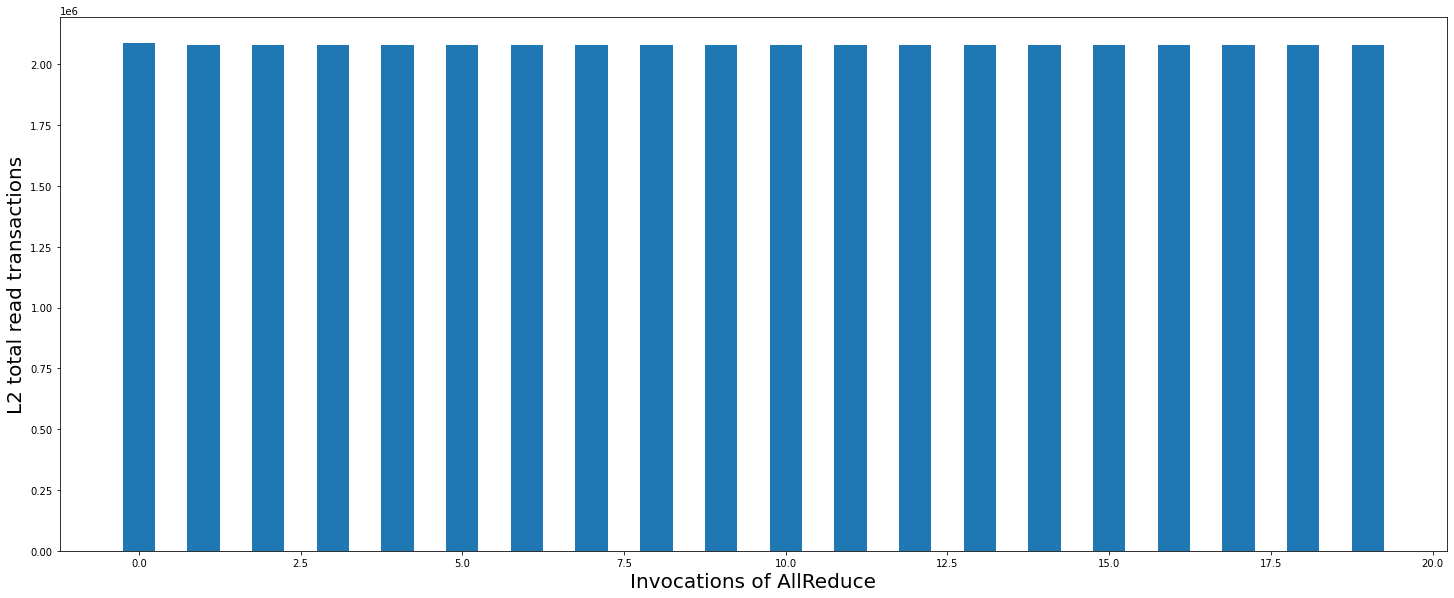

In [10]:
plot_bar(l2rt, xlabel='Invocations of AllReduce', ylabel='L2 total read transactions',width=0.5)

In [14]:
t_r = l2rt.mean()

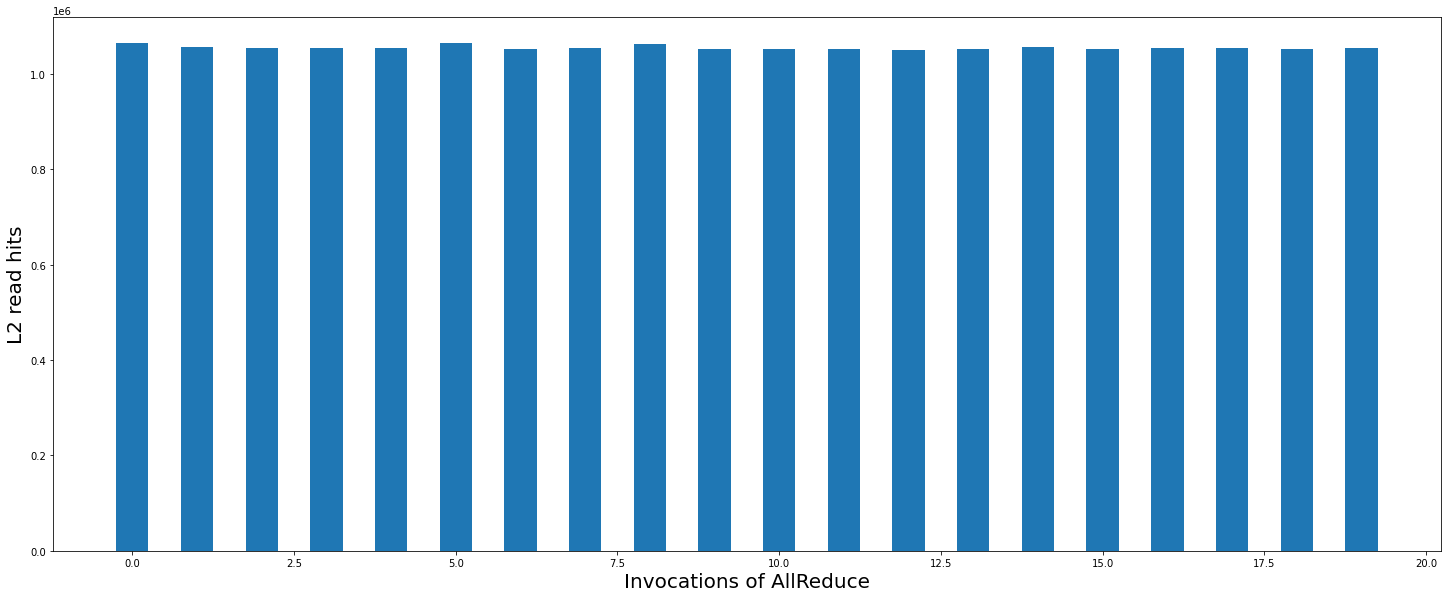

In [12]:
plot_bar(l2rt-dramrt, xlabel='Invocations of AllReduce', ylabel='L2 read hits',width=0.5)

In [15]:
h_r = (l2rt-dramrt).mean()

In [16]:
print("av. L2 total read transactions: {}".format(t_r))
print("av. L2 read hits: {}".format(h_r))
print("hitrate: {}%".format(100*h_r/t_r))

av. L2 total read transactions: 2078068.1
av. L2 read hits: 1055330.725
hitrate: 50.78422237461805%


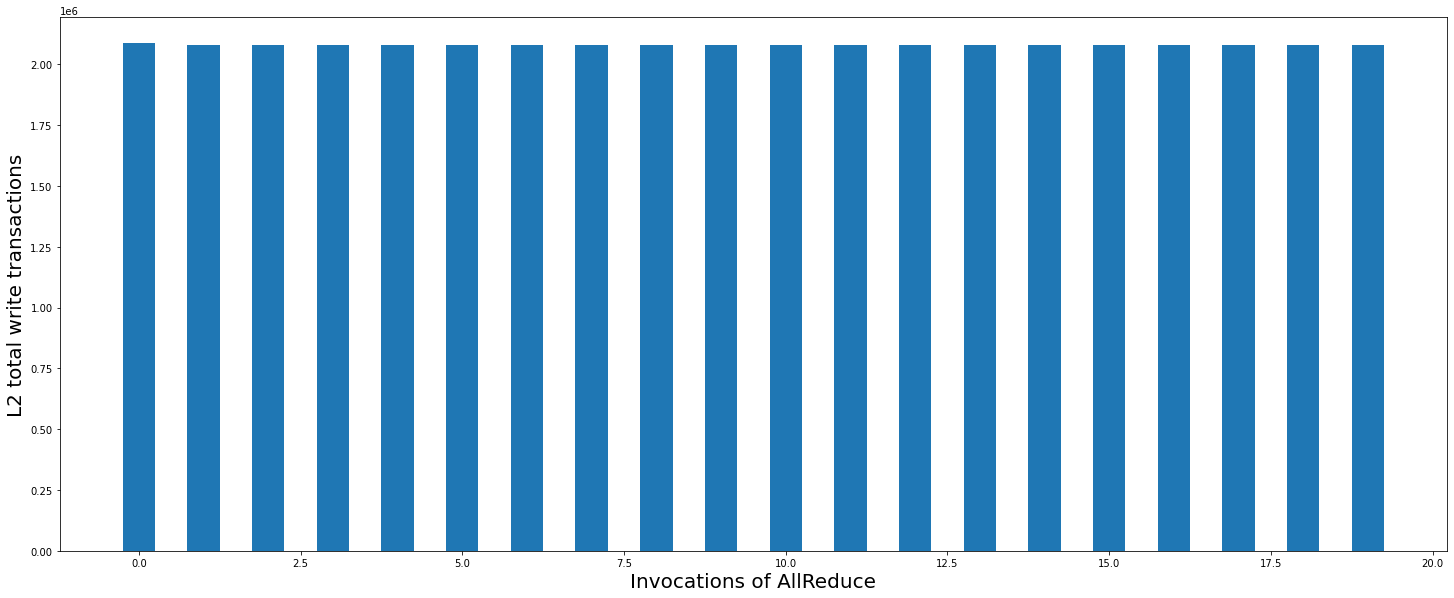

In [17]:
plot_bar(l2rt, xlabel='Invocations of AllReduce', ylabel='L2 total write transactions',width=0.5)

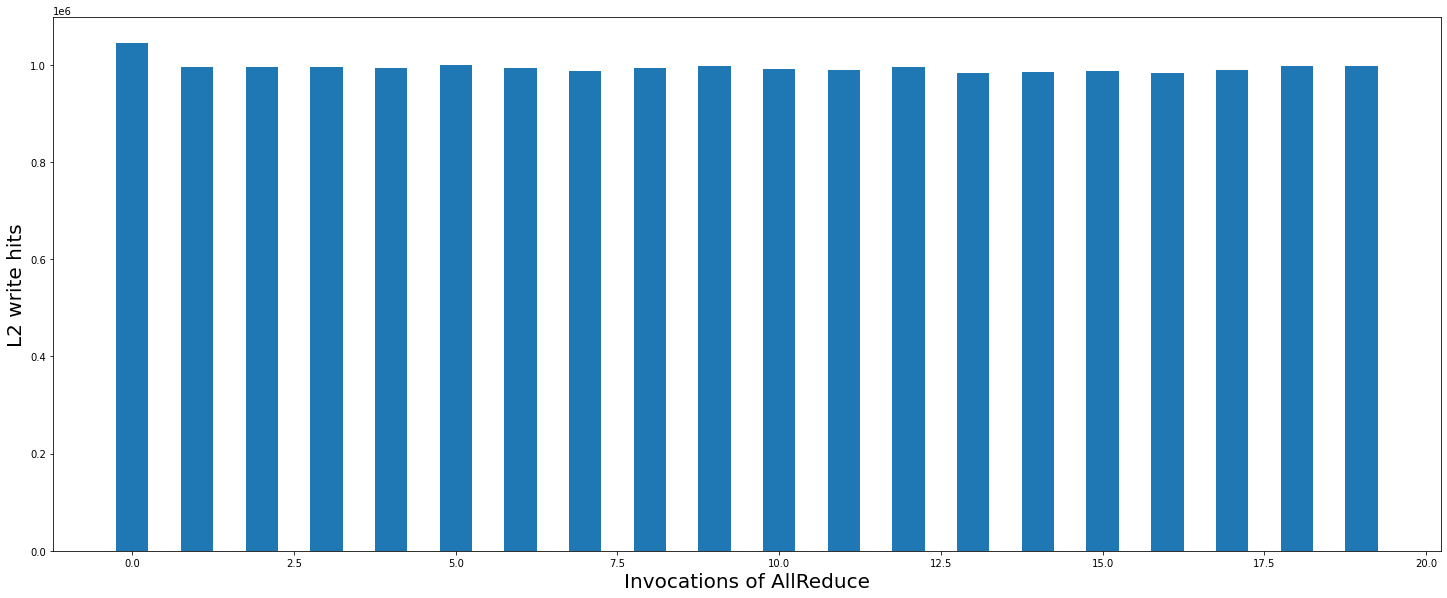

In [21]:
plot_bar(l2rt-dramwt, xlabel='Invocations of AllReduce', ylabel='L2 write hits',width=0.5)

In [19]:
t_w = l2wt.mean()
h_w = (l2wt - dramwt).mean()

In [20]:
print("av. L2 total write transactions: {}".format(t_w))
print("av. L2 write hits: {}".format(h_w))
print("hitrate: {}%".format(100*h_w/t_w))

av. L2 total write transactions: 2175708.45
av. L2 write hits: 1092734.4
hitrate: 50.22430280123239%
